<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

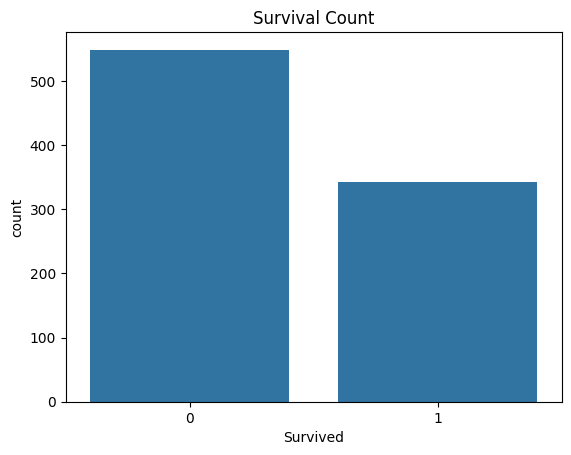

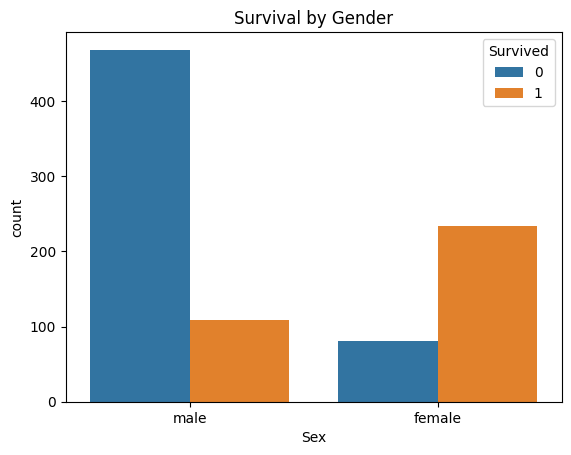

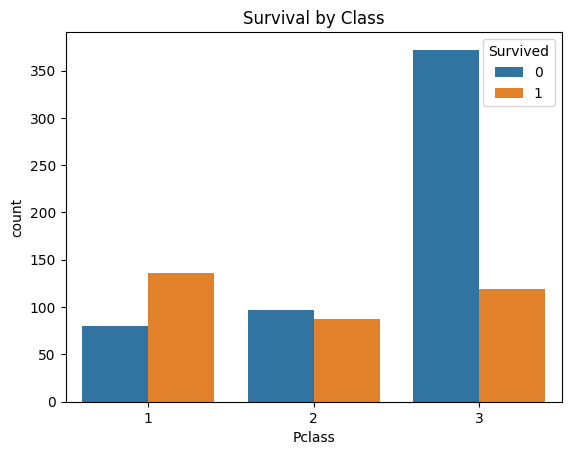

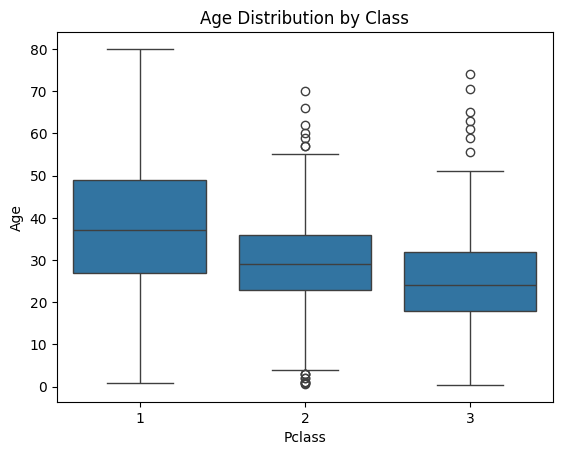

<ipython-input-7-6b08d205a2fd>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-6b08d205a2fd>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Model: Logistic Regression
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Model: Random Forest
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[91 14]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



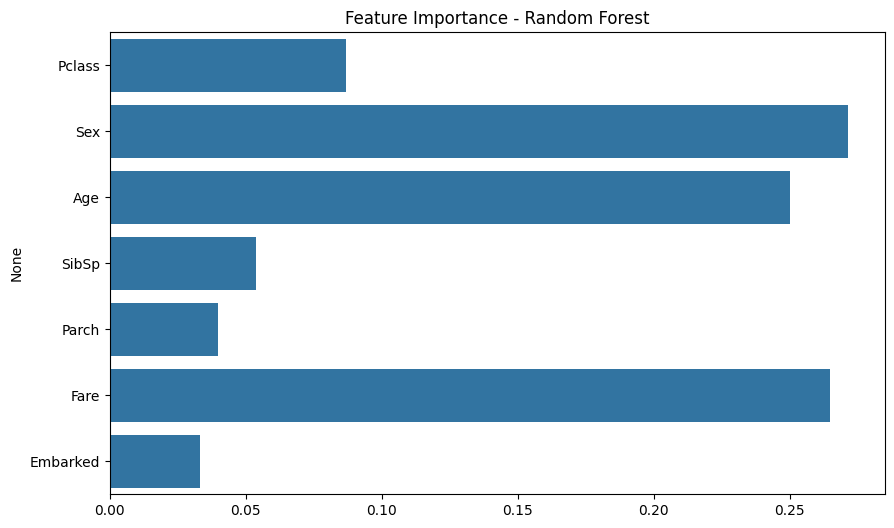

In [7]:
# Titanic Survivor Prediction - Google Colab Notebook

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load Dataset

# Load Dataset
#df = pd.read_csv('https://drive.google.com/file/d/1MTOFfJNqD6aPZBG6BwYXiJx3EmSh-mPq/view?usp=sharing')
file_idt = "1Pf-t_SyT20sJ3lhxhzhJJ1G7dVKw5zdV"
urlt = f"https://drive.google.com/uc?id={file_idt}"
df = pd.read_csv(urlt)
df.head()

# 3. Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualizations
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution by Class")
plt.show()

# 4. Data Preprocessing
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# 5. Feature Engineering
X = df.drop('Survived', axis=1)
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Model Training
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 7. Model Evaluation
def evaluate(model_name, y_true, y_pred):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate("Logistic Regression", y_test, log_preds)
evaluate("Random Forest", y_test, rf_preds)

# 8. Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_names = df.drop('Survived', axis=1).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.show()
